<a href="https://colab.research.google.com/github/varshithreddy07/Explainable-Ai-Practical/blob/main/Exp_AI_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1


Dataset preview:
   Number of TV Ads (x)  Number of Cars Sold (y)
0                     1                       14
1                     3                       24
2                     2                       18
3                     1                       17
4                     3                       27

Linear Regression Equation: y = 10.00 + 5.00x

Prediction for 10 TV ads: 60.00 cars

Generating SHAP Waterfall plot for first instance...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


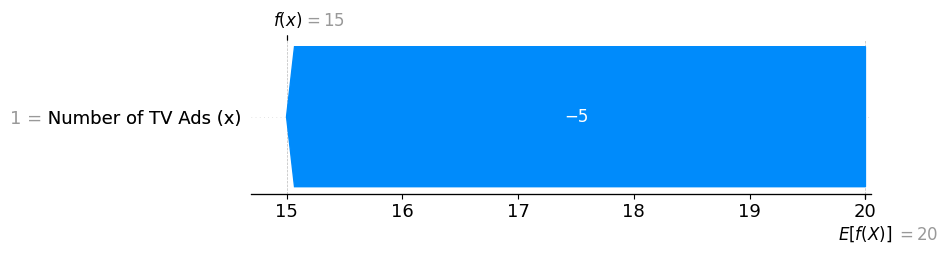


Generating SHAP Force plot for all predictions...


In [ ]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import shap

# Load Excel file
df = pd.read_excel("Car_Sales.xlsx")

# Preview data
print("Dataset preview:")
print(df.head())

# Use correct column names from your dataset
X = df[['Number of TV Ads (x)']]
y = df['Number of Cars Sold (y)']

# Fit Linear Regression Model
model = LinearRegression()
model.fit(X, y)

intercept = model.intercept_
slope = model.coef_[0]

# Display Linear Equation
print(f"\nLinear Regression Equation: y = {intercept:.2f} + {slope:.2f}x")

# Predict for 10 TV ads
x_test = np.array([[10]])
y_pred = model.predict(x_test)
print(f"\nPrediction for 10 TV ads: {y_pred[0]:.2f} cars")

# SHAP Analysis
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

# SHAP Waterfall Plot for first instance
print("\nGenerating SHAP Waterfall plot for first instance...")
shap.plots.waterfall(shap_values[0])

# SHAP Force Plot for all predictions
print("\nGenerating SHAP Force plot for all predictions...")
shap.plots.force(shap_values)

# Show plots
plt.show()


Problem 2

Cleaned column names: ['IQ', 'StudyHours', 'TestScore']
    IQ  StudyHours  TestScore
0  110          40        100
1  120          30         90
2  100          20         80
3   90           0         70
4   80          10         60

Regression Equation: TestScore = 20.00 + 0.50×IQ + 0.50×StudyHours

Prediction for IQ = 95 and StudyHours = 25: 80.00

SHAP Waterfall Plot for First Student:


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


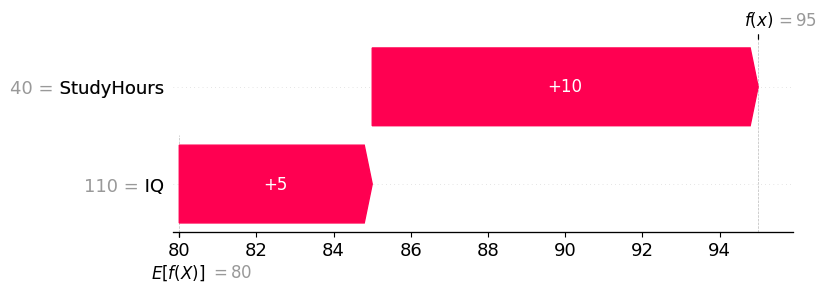


SHAP Force Plot for All Students:

Student 1:
IQ Contribution: 5.00
Study Hours Contribution: 10.00

Student 2:
IQ Contribution: 10.00
Study Hours Contribution: 5.00

Student 3:
IQ Contribution: 0.00
Study Hours Contribution: 0.00

Student 4:
IQ Contribution: -5.00
Study Hours Contribution: -10.00

Student 5:
IQ Contribution: -10.00
Study Hours Contribution: -5.00


In [ ]:
# Step 1: Load dataset
df = pd.read_excel("StudyHour.xlsx")

# Step 2: Clean column names (remove spaces, newlines)
df.columns = df.columns.str.strip().str.replace('\n', '').str.replace(' ', '')

# Confirm cleaned column names
print("Cleaned column names:", df.columns.tolist())
print(df.head())

# Step 3: Define features and target with cleaned names
X = df[['IQ', 'StudyHours']]
y = df['TestScore']

# Step 4: Fit Multiple Linear Regression Model
model = LinearRegression()
model.fit(X, y)

intercept = model.intercept_
coef_iq = model.coef_[0]
coef_hours = model.coef_[1]

print(f"\nRegression Equation: TestScore = {intercept:.2f} + {coef_iq:.2f}×IQ + {coef_hours:.2f}×StudyHours")

# Step 5: Predict Test Score for IQ = 95, StudyHours = 25
x_pred = np.array([[95, 25]])
y_pred = model.predict(x_pred)
print(f"\nPrediction for IQ = 95 and StudyHours = 25: {y_pred[0]:.2f}")

# Step 6: SHAP Explanation
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

# SHAP Waterfall Plot for First Student
print("\nSHAP Waterfall Plot for First Student:")
shap.plots.waterfall(shap_values[0])

# SHAP Force Plot for All Predictions
print("\nSHAP Force Plot for All Students:")
shap.plots.force(shap_values)

# Optional: Print SHAP contributions
for i in range(len(df)):
    print(f"\nStudent {i+1}:")
    print(f"IQ Contribution: {shap_values.values[i][0]:.2f}")
    print(f"Study Hours Contribution: {shap_values.values[i][1]:.2f}")

# Show all plots
plt.show()


Problem 3

Dataset Preview:
   YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891
Column names: ['YearsExperience', 'Salary']

Linear Regression Equation: Salary = 25792.20 + 9449.96 × YearsExperience

Intercept: 25792.20 (Estimated salary with 0 years of experience)
Slope: 9449.96 (Increase in salary for each additional year of experience)
Predicted salary for 3.5 years of experience: 58867.07
Predicted salary for 7.0 years of experience: 91941.94

SHAP Waterfall Plot for First Instance:


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


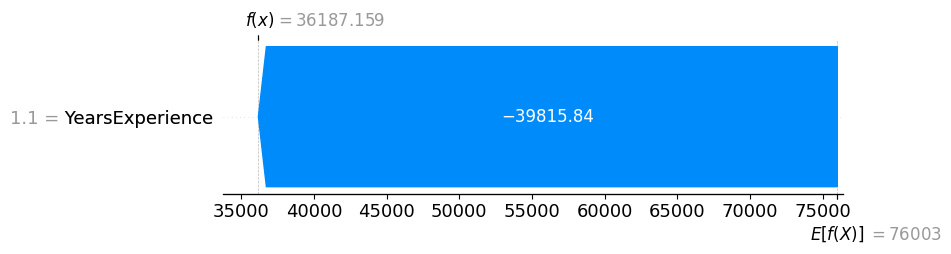


SHAP Force Plot for All Predictions:

Instance 1:
YearsExperience = 1.1 | SHAP Contribution = -39815.84

Instance 2:
YearsExperience = 1.3 | SHAP Contribution = -37925.85

Instance 3:
YearsExperience = 1.5 | SHAP Contribution = -36035.86

Instance 4:
YearsExperience = 2.0 | SHAP Contribution = -31310.88

Instance 5:
YearsExperience = 2.2 | SHAP Contribution = -29420.88

Instance 6:
YearsExperience = 2.9 | SHAP Contribution = -22805.91

Instance 7:
YearsExperience = 3.0 | SHAP Contribution = -21860.91

Instance 8:
YearsExperience = 3.2 | SHAP Contribution = -19970.92

Instance 9:
YearsExperience = 3.2 | SHAP Contribution = -19970.92

Instance 10:
YearsExperience = 3.7 | SHAP Contribution = -15245.94

Instance 11:
YearsExperience = 3.9 | SHAP Contribution = -13355.95

Instance 12:
YearsExperience = 4.0 | SHAP Contribution = -12410.95

Instance 13:
YearsExperience = 4.0 | SHAP Contribution = -12410.95

Instance 14:
YearsExperience = 4.1 | SHAP Contribution = -11465.95

Instance 15:
Years

In [ ]:
# Step 1: Load dataset
df = pd.read_csv("Experience_Salary.csv")  # Make sure the file is in your working directory

# Preview data and check column names
print("Dataset Preview:")
print(df.head())
print("Column names:", df.columns.tolist())

# Clean column names if necessary
df.columns = df.columns.str.strip().str.replace('\n', '').str.replace(' ', '')

# Step 2: Define independent (X) and dependent (y) variables
X = df[['YearsExperience']]
y = df['Salary']

# Step 3: Fit simple linear regression model
model = LinearRegression()
model.fit(X, y)

# Get coefficients
intercept = model.intercept_
slope = model.coef_[0]

# Display equation
print(f"\nLinear Regression Equation: Salary = {intercept:.2f} + {slope:.2f} × YearsExperience")

# Step 4: Interpret Coefficients
print(f"\nIntercept: {intercept:.2f} (Estimated salary with 0 years of experience)")
print(f"Slope: {slope:.2f} (Increase in salary for each additional year of experience)")

# Step 5: Predictions
years_list = [3.5, 7.0]
for years in years_list:
    predicted_salary = model.predict(np.array([[years]]))[0]
    print(f"Predicted salary for {years} years of experience: {predicted_salary:.2f}")

# Step 6: SHAP Analysis
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

# SHAP Waterfall plot for the first instance
print("\nSHAP Waterfall Plot for First Instance:")
shap.plots.waterfall(shap_values[0])

# SHAP Force plot for all predictions
print("\nSHAP Force Plot for All Predictions:")
shap.plots.force(shap_values)

# Optional: Print SHAP values for all instances
for i in range(len(df)):
    print(f"\nInstance {i+1}:")
    print(f"YearsExperience = {X.iloc[i, 0]} | SHAP Contribution = {shap_values.values[i][0]:.2f}")

# Show plots
plt.show()


Problem 4

Regression Equation: Sales = 993.92 + 8.22 * Intelligence + 49.71 * Extroversion
Prediction for Intelligence=100, Extroversion=25: 3058.631617109059
Prediction for Intelligence=120, Extroversion=18: 2875.0694134905466


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


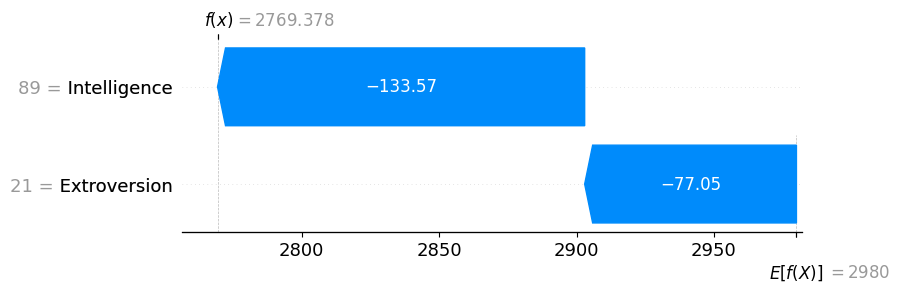

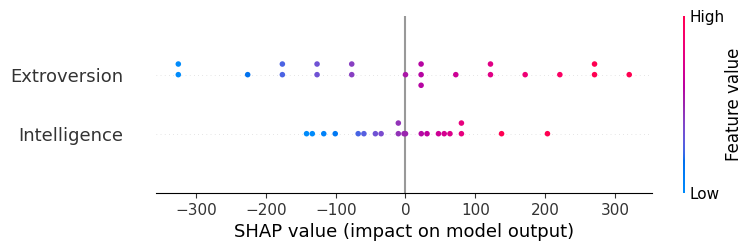

In [ ]:
# 1. Load the dataset
df = pd.read_excel("Int_Ext.xlsx")  # Replace with correct path if needed

# 2. Clean column names and rename
df.columns = df.columns.str.strip().str.title()
df = df.rename(columns={'Int': 'Intelligence', 'Ext': 'Extroversion', 'Sal': 'Sales'})

# 3. Drop rows with missing values
df = df[['Intelligence', 'Extroversion', 'Sales']].dropna()

# 4. Define features and target
X = df[['Intelligence', 'Extroversion']]
y = df['Sales']

# 5. Fit Linear Regression model
model = LinearRegression()
model.fit(X, y)

# 6. Print model equation
print("Regression Equation: Sales = {:.2f} + {:.2f} * Intelligence + {:.2f} * Extroversion".format(
    model.intercept_, model.coef_[0], model.coef_[1]
))

# 7. Predict sales
print("Prediction for Intelligence=100, Extroversion=25:", model.predict([[100, 25]])[0])
print("Prediction for Intelligence=120, Extroversion=18:", model.predict([[120, 18]])[0])

# 8. SHAP Analysis
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

# 9. Waterfall plot for 1st prediction
shap.plots.waterfall(shap_values[0])
plt.show()

# 10. Force plot (works best in Jupyter or HTML)
shap.initjs()
force_plot = shap.plots.force(shap_values[0])
shap.save_html("force_plot.html", force_plot)

# 11. Summary Plot
shap.plots.beeswarm(shap_values)
plt.show()


Problem 5

Regression Equation: Sales = 11.00 + 0.20 * Facebook + 0.01 * Newspaper
Prediction for Facebook=50, Newspaper=70: 21.442951634688967
Prediction for Facebook=25, Newspaper=30: 16.184654364042814


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


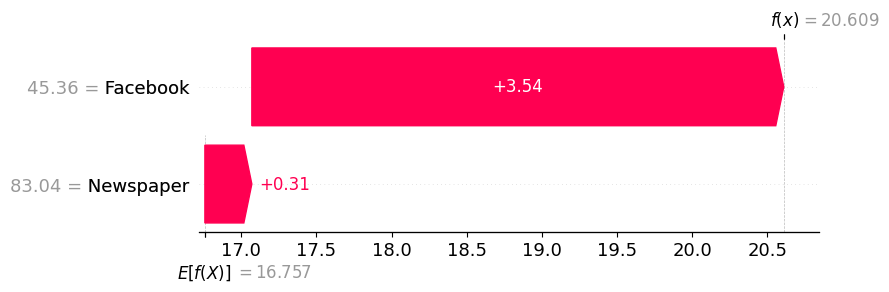

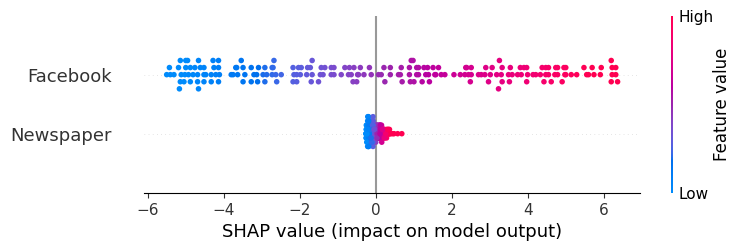

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import shap
import matplotlib.pyplot as plt

# 1. Load the dataset
df = pd.read_excel("Marketing_Dataset.xlsx")  # Replace with correct path

# 2. Clean column names
df.columns = df.columns.str.strip().str.title()
df = df.rename(columns={'Facebook': 'Facebook', 'Newspaper': 'Newspaper', 'Sales': 'Sales'})

# 3. Drop missing values
df = df[['Facebook', 'Newspaper', 'Sales']].dropna()

# 4. Define features and target
X = df[['Facebook', 'Newspaper']]
y = df['Sales']

# 5. Fit Linear Regression model
model = LinearRegression()
model.fit(X, y)

# 6. Print model equation
print("Regression Equation: Sales = {:.2f} + {:.2f} * Facebook + {:.2f} * Newspaper".format(
    model.intercept_, model.coef_[0], model.coef_[1]
))

# 7. Predict sales
print("Prediction for Facebook=50, Newspaper=70:", model.predict([[50, 70]])[0])
print("Prediction for Facebook=25, Newspaper=30:", model.predict([[25, 30]])[0])

# 8. SHAP Analysis
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

# 9. Waterfall plot for 1st prediction
shap.plots.waterfall(shap_values[0])
plt.show()

# 10. Force plot
shap.initjs()
force_plot = shap.plots.force(shap_values[0])
shap.save_html("force_plot.html", force_plot)

# 11. Summary Plot
shap.plots.beeswarm(shap_values)
plt.show()
